# Data Analytics - Assignment 123



## 1st assignment - due Feb 16, 2018

1. Provide an overall description of the dataset. Explain its structure, provide an overview of the main variables and explain what aspects of the game / platform they capture

2. Study the distributional properties of players’ activity. Plot the distribution of at least three variables related to activity (e.g., total shots hit, total kills, time spent playing, etc) and study their distributional properties: measure the first four moments, discuss which class of distribution might be best suited to describe the data and why, and fit it to the data.

3. Describe the methodologies employed to obtain the results of your project. If you use off-the- shelf software, you are expected to outline how they work and which methods they use.

4. Summarize your findings in an individual report of less than 2000 words Marking criteria


## 2nd assignment - due March 22, 2018

• Choose a statistical problem / research question for your final report and tackle it
• This can be a research question of your choice, or one of the challenges suggested by
DreamTeam (see list of “Data Science tasks” by DreamTeam)
• Present the main results in a 1-page individual executive summary containing one figure or
one table. Avoid excessive technicalities, which can be explained extensively in the final
report.
• Marking criteria:
- Clarity of language and exposition
- Self-consistency of the summary
- Readability of the figure or table that you include (it is mandatory to include one of the
two)
- Ability to identify and summarize your key findings findings and make them easy to grasp
• This will count as 15% of your final mark

## Final report - due March 29, 2018

• Combine a presentation of the DreamTeam dataset, the results of your 1st assignment and a
detailed description of your project in an individual final report of no more than 5000
words.
• Feel free to re-use the material from your 1st assignment report or to change it / improve it as
you like based on the feedback you received
• Describe the methodologies employed to obtain the results of your project. If you use off-theshelf
software or packages, you are expected to outline how they work and which
methods they use.
• Marking criteria:
- Is the introduction clearly reporting the essential points?
- Are the methodologies explained well?
- Are results and finding clear and correct? (Keep in mind: negative results are OK!)
- Are figures, tables, and captions comprehensible?
- Are conclusions reporting the main findings and highlighting the limitations and
possible extensions of your work?
• The final report will count as 40% of your final mark


# Import data from database

In [5]:
import numpy as np
import pandas as pd
#import psycopg2
import seaborn as sns
import scipy as sp
from scipy import stats
#from scipy.stats import norm
#%matplotlib inline
#import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

ModuleNotFoundError: No module named 'matplotlib.patches'

In [3]:
#load weapons table 
conn = psycopg2.connect("dbname='dreamteam' user='jennyyang' host='localhost' port='5432' password=''")
cur = conn.cursor()
cur.execute('SELECT * FROM csgo.weapons_stats')
colnames_w = [desc[0] for desc in cur.description]
csgo_weapons = cur.fetchall()
cur.close()
conn.close()


In [4]:
csgo_weapons = pd.DataFrame(csgo_weapons, columns = colnames_w)
# data shape
print("data shape:",csgo_weapons.shape)
weapons_counts = csgo_weapons['weapon_name'].value_counts()
#print("No. of weapon types:",weapons_counts)
#print()
#print columns
print("There are",csgo_weapons.shape[1],"columns:")
print(colnames_w)
#csgo_weapons[:5]

data shape: (683001, 5)
There are 5 columns:
['user_id', 'weapon_name', 'total_kills', 'total_hits', 'total_shots']


In [9]:
#load profile table 
conn = psycopg2.connect("dbname='dreamteam' user='jennyyang' host='localhost' port='5432' password=''")
cur = conn.cursor()
cur.execute('SELECT * FROM csgo.profiles')
colnames_p = [desc[0] for desc in cur.description]
csgo_profiles = cur.fetchall()
cur.close()
conn.close()

In [10]:
csgo_profiles = pd.DataFrame(csgo_profiles, columns = colnames_p)
# data shape
print("data shape:",csgo_profiles.shape)
print("No. of users:",csgo_profiles['user_id'].count())
print()
# print columns
print("There are",csgo_profiles.shape[1],"columns:")
print(colnames_p)
csgo_profiles[:5]

data shape: (84393, 17)
No. of users: 84393

There are 17 columns:
['user_id', 'nickname', 'total_kills', 'total_deaths', 'total_time_played', 'total_kills_headshot', 'total_shots_hit', 'total_mvps', 'total_wins', 'total_rounds_played', 'total_shots_fired', 'rank_id', 'goal_id', 'steam_id', 'about', 'updated_at', 'compensation']


,user_id,nickname,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,about,updated_at,compensation
0,1,s1rc0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,None,NaT,NaN
1,5,rabbitshu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,None,NaT,NaN
2,3,Mochojojo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,None,NaT,NaN
3,206,BoyKot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,7.656120e+16,None,2017-12-09 03:10:27.954734+00:00,NaN
4,382,hazzard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,None,NaT,NaN


# Data cleaning 

In [6]:
# No. of NAs for each column
csgo_profiles.isnull().sum()

user_id                     0
nickname                    0
total_kills              8474
total_deaths             8471
total_time_played        8466
total_kills_headshot     8480
total_shots_hit          8470
total_mvps               8573
total_wins               8477
total_rounds_played      8468
total_shots_fired        8468
rank_id                     0
goal_id                     0
steam_id                 5925
about                   72854
updated_at               6988
compensation            84392
dtype: int64

In [7]:
# Drop users who haven't played the game
# Drop NA
profiles_plyrs = csgo_profiles.dropna(axis=0, subset=['total_time_played'],how='any')
print("No. of players:",profiles_plyrs['user_id'].count())
# Drop zero
profiles_plyrs = profiles_plyrs[profiles_plyrs['total_time_played']!=0]
print("No. of players:",profiles_plyrs['user_id'].count())

No. of players: 75927
No. of players: 75924


In [8]:
# Drop users who haven't cmpleted a round
# Drop NA
profiles_plyrs = csgo_profiles.dropna(axis=0, subset=['total_rounds_played'] ,how='any')
print("No. of players:",profiles_plyrs['user_id'].count())
# Drop zero
profiles_plyrs = profiles_plyrs[profiles_plyrs['total_rounds_played']!=0]
print("No. of players:",profiles_plyrs['user_id'].count())

No. of players: 75925
No. of players: 75924


In [9]:
# Drop users who have no steam_id
# Drop NA
profiles_plyrs = profiles_plyrs.dropna(axis=0, subset=['steam_id'],how='any')
print("No. of players:",profiles_plyrs['user_id'].count())
# Drop zero
profiles_plyrs = profiles_plyrs[profiles_plyrs['steam_id']!=0]
print("No. of players:",profiles_plyrs['user_id'].count())

No. of players: 75915
No. of players: 75915


In [10]:
# No. of NAs for each column
profiles_plyrs.isnull().sum()

user_id                     0
nickname                    0
total_kills                 8
total_deaths                4
total_time_played           0
total_kills_headshot       14
total_shots_hit             4
total_mvps                105
total_wins                  9
total_rounds_played         0
total_shots_fired           2
rank_id                     0
goal_id                     0
steam_id                    0
about                   64763
updated_at                  0
compensation            75915
dtype: int64

In [11]:
# Drop users who have never died
# Drop NA
profiles_plyrs = profiles_plyrs.dropna(axis=0, subset=['total_deaths'],how='any')
print("No. of players:",profiles_plyrs['user_id'].count())
# Drop zero
profiles_plyrs = profiles_plyrs[profiles_plyrs['total_deaths']!=0]
print("No. of players:",profiles_plyrs['user_id'].count())

No. of players: 75911
No. of players: 75910


In [12]:
# No. of NAs for each column
profiles_plyrs.isnull().sum()

user_id                     0
nickname                    0
total_kills                 7
total_deaths                0
total_time_played           0
total_kills_headshot       13
total_shots_hit             3
total_mvps                104
total_wins                  8
total_rounds_played         0
total_shots_fired           1
rank_id                     0
goal_id                     0
steam_id                    0
about                   64758
updated_at                  0
compensation            75910
dtype: int64

In [13]:
#Replace NA values with 0

profiles = profiles_plyrs.copy()
columns = ['total_kills','total_deaths','total_kills_headshot','total_shots_hit','total_mvps','total_wins','total_rounds_played','total_shots_fired']
for c in columns:
    profiles[c] = profiles[c].fillna(0)
# reindex
profiles.index = range(len(profiles))
print("After replacement:")
print(profiles.shape)
print()
print(profiles.isnull().sum())
print()

After replacement:
(75910, 17)

user_id                     0
nickname                    0
total_kills                 0
total_deaths                0
total_time_played           0
total_kills_headshot        0
total_shots_hit             0
total_mvps                  0
total_wins                  0
total_rounds_played         0
total_shots_fired           0
rank_id                     0
goal_id                     0
steam_id                    0
about                   64758
updated_at                  0
compensation            75910
dtype: int64



In [14]:
np.corrcoef(profiles['total_deaths'],profiles['total_kills'])

array([[ 1.        ,  0.48620197],
       [ 0.48620197,  1.        ]])

In [14]:
# Drop users who have never shoot

# Drop zero
profiles_allshot = profiles_plyrs[profiles_plyrs['total_shots_fired']!=0]
print("No. of players:",profiles_plyrs['user_id'].count())

# reindex
profiles_allshot.index = range(len(profiles_allshot))
print("After replacement:")
print(profiles_allshot.shape)
print()
print(profiles_allshot.isnull().sum())
print()


No. of players: 75910
After replacement:
(75910, 17)

user_id                     0
nickname                    0
total_kills                 7
total_deaths                0
total_time_played           0
total_kills_headshot       13
total_shots_hit             3
total_mvps                104
total_wins                  8
total_rounds_played         0
total_shots_fired           1
rank_id                     0
goal_id                     0
steam_id                    0
about                   64758
updated_at                  0
compensation            75910
dtype: int64



In [17]:
active_profiles = profiles
active_profiles = active_profiles[active_profiles["total_mvps"] < active_profiles["total_rounds_played"]]
print(active_profiles.shape)
active_profiles = active_profiles[active_profiles["total_wins"] < active_profiles["total_rounds_played"]]
print(active_profiles.shape)
active_profiles = active_profiles[active_profiles["total_shots_hit"] < active_profiles["total_shots_fired"]]
print(active_profiles.shape)
active_profiles = active_profiles[active_profiles["total_kills_headshot"] < active_profiles["total_shots_fired"]]
print(active_profiles.shape)
active_profiles = active_profiles[active_profiles["total_mvps"] < active_profiles["total_wins"]]
print(active_profiles.shape)
active_profiles

(75887, 17)
(74880, 17)
(74876, 17)
(74854, 17)
(74761, 17)


,user_id,nickname,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,about,updated_at,compensation
0,145,Eugene,1.0,9.0,1216.0,0.0,8.0,0.0,2.0,16.0,11.0,1,1,7.656120e+16,None,2017-12-09 03:10:28.514889+00:00,NaN
1,216,Rz-Baron,47887.0,60368.0,4726211.0,14766.0,148706.0,3122.0,22932.0,45169.0,844161.0,11,1,7.656120e+16,None,2017-12-09 03:10:28.803997+00:00,NaN
2,154,dreamteam.gg,310.0,344.0,9229.0,85.0,1604.0,0.0,28.0,51.0,9192.0,1,3,7.656120e+16,None,2017-12-09 03:10:28.940558+00:00,NaN
3,187,FuN1111,82.0,110.0,10472.0,24.0,335.0,9.0,44.0,80.0,3124.0,1,1,7.656120e+16,None,2017-12-09 03:10:29.118630+00:00,NaN
4,139,VLADIK MORG,2726.0,2635.0,64640.0,608.0,12697.0,9.0,80.0,158.0,64886.0,17,1,7.656120e+16,None,2017-12-09 03:10:29.871780+00:00,NaN
5,176,KhinShen,104506.0,134275.0,2510854.0,31266.0,91449.0,2743.0,8728.0,18005.0,420633.0,8,1,7.656120e+16,None,2017-12-09 03:10:30.121044+00:00,NaN
6,219,NiFall,42387.0,28211.0,2064934.0,14573.0,139742.0,4814.0,15685.0,27894.0,837688.0,8,2,7.656120e+16,None,2017-12-09 03:10:30.309070+00:00,NaN
7,189,adzuma,45239.0,36772.0,3349786.0,18167.0,139443.0,6655.0,24288.0,47078.0,726799.0,16,3,7.656120e+16,None,2017-12-09 03:10:30.614950+00:00,NaN
8,183,Ablaze,9687.0,9284.0,723996.0,3683.0,32367.0,1169.0,5194.0,9939.0,187014.0,18,3,7.656120e+16,Top player EU,2017-12-09 03:10:30.795407+00:00,NaN
9,185,amillern,303.0,147.0,15628.0,125.0,1043.0,48.0,117.0,206.0,4972.0,1,1,7.656120e+16,None,2017-12-09 03:10:31.045224+00:00,NaN


In [11]:
sns.distplot(profiles['total_kills'],kde=False)

NameError: name 'profiles' is not defined

In [7]:
# Shots_hit rate
#
# check players with zero 'total_shots_fired'
print("No. of zero 'total_shots_fired':",len(profiles_allshot[profiles_allshot['total_shots_fired']==0]))
# calculate hit/shot rate
for row in range(0,profiles_allshot.shape[0]):
    if profiles_allshot.loc[row,'total_shots_fired']!=0:
        profiles_allshot.loc[row,'shots_hit_rate'] = profiles_allshot.loc[row,'total_shots_hit']/profiles_allshot.loc[row,'total_shots_fired']
print()
print("mean:",profiles_allshot['shots_hit_rate'].mean())
print()
print(profiles_allshot.isnull().sum())

NameError: name 'profiles_allshot' is not defined

In [33]:
active_profiles['headshot/kills'] = active_profiles['headshot/kills'].fillna(0)
print(active_profiles.isnull().sum())

user_id                     0
nickname                    0
total_kills                 0
total_deaths                0
total_time_played           0
total_kills_headshot        0
total_shots_hit             0
total_mvps                  0
total_wins                  0
total_rounds_played         0
total_shots_fired           0
rank_id                     0
goal_id                     0
steam_id                    0
about                   63797
updated_at                  0
compensation            74761
kills/round                 0
deaths/round                0
mvps/win                    0
wins/round                  0
headshot/kills              0
shothit/shotfire            0
kill/death                  0
time/round                  0
headshot/round              0
shothit/round               0
dtype: int64


In [19]:
active_profiles["kills/round"] = active_profiles["total_kills"]/active_profiles["total_rounds_played"]
active_profiles["deaths/round"] = active_profiles["total_deaths"]/active_profiles["total_rounds_played"]
active_profiles["mvps/win"] = active_profiles["total_mvps"]/active_profiles["total_wins"]
active_profiles["wins/round"] = active_profiles["total_wins"]/active_profiles["total_rounds_played"]
active_profiles["headshot/kills"] = active_profiles["total_kills_headshot"]/active_profiles["total_kills"]
active_profiles["shothit/shotfire"] = active_profiles["total_shots_hit"]/active_profiles["total_shots_fired"]
active_profiles["kill/death"] = active_profiles["total_kills"]/active_profiles["total_deaths"]
active_profiles["time/round"] = active_profiles["total_time_played"]/active_profiles["total_rounds_played"]
active_profiles["headshot/round"] = active_profiles["total_kills_headshot"]/active_profiles["total_rounds_played"]
active_profiles["shothit/round"] = active_profiles["total_shots_hit"]/active_profiles["total_rounds_played"]
active_profiles.shape

(74761, 27)

In [ ]:
active_profiles["kills/round"] = active_profiles["total_kills"]/active_profiles["total_rounds_played"]
active_profiles["deaths/round"] = active_profiles["total_deaths"]/active_profiles["total_rounds_played"]
active_profiles["mvps/win"] = active_profiles["total_mvps"]/active_profiles["total_wins"]
active_profiles["wins/round"] = active_profiles["total_wins"]/active_profiles["total_rounds_played"]
active_profiles["headshot/kills"] = active_profiles["total_kills_headshot"]/active_profiles["total_kills"]
active_profiles["shothit/shotfire"] = active_profiles["total_shots_hit"]/active_profiles["total_shots_fired"]
active_profiles["kill/death"] = active_profiles["total_kills"]/active_profiles["total_deaths"]
active_profiles["time/round"] = active_profiles["total_time_played"]/active_profiles["total_rounds_played"]
active_profiles["headshot/round"] = active_profiles["total_kills_headshot"]/active_profiles["total_rounds_played"]
active_profiles["shothit/round"] = active_profiles["total_shots_hit"]/active_profiles["total_rounds_played"]


In [13]:
active_profiles['kills/round_log'] = np.log(1+active_profiles['kills/round'])
active_profiles['deaths/round_log'] = np.log(1+active_profiles['deaths/round'])
active_profiles['mvps/win_log'] = np.log(1+active_profiles['mvps/win'])
active_profiles['wins/round_log'] = np.log(1+active_profiles['wins/round'])
active_profiles['headshot/kills_log'] = np.log(1+active_profiles['headshot/kills'])
active_profiles['shothit/shotfire_log'] = np.log(1+active_profiles['shothit/shotfire'])
active_profiles['kill/death_log'] = np.log(1+active_profiles['kill/death'])
active_profiles['time/round_log'] = np.log(1+active_profiles['time/round'])
active_profiles['headshot/round_log'] = np.log(1+active_profiles['headshot/round'])
active_profiles['shothit/round_log'] = np.log(1+active_profiles['shothit/round'])


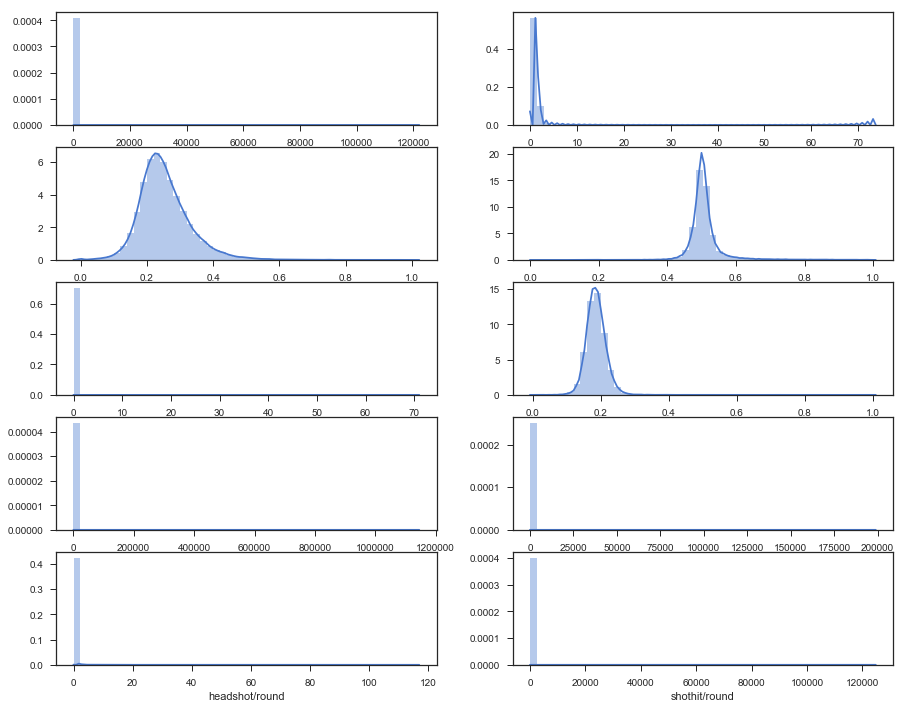

In [34]:
sns.set(style="ticks", palette="muted")
f, axes = plt.subplots(5, 2, figsize=(15, 12),sharex=False)
sns.distplot(active_profiles["kills/round"] ,ax=axes[0, 0])
sns.distplot(active_profiles["deaths/round"] ,ax=axes[0, 1])
sns.distplot(active_profiles["mvps/win"] ,ax=axes[1, 0])
sns.distplot(active_profiles["wins/round"],ax=axes[1, 1])
sns.distplot(active_profiles["headshot/kills"] ,ax=axes[2, 0])
sns.distplot(active_profiles["shothit/shotfire"] ,ax=axes[2, 1])
sns.distplot(active_profiles["kill/death"] ,ax=axes[3, 0])
sns.distplot(active_profiles["time/round"],ax=axes[3, 1])
sns.distplot(active_profiles["headshot/round"] ,ax=axes[4, 0])
sns.distplot(active_profiles["shothit/round"] ,ax=axes[4, 1])


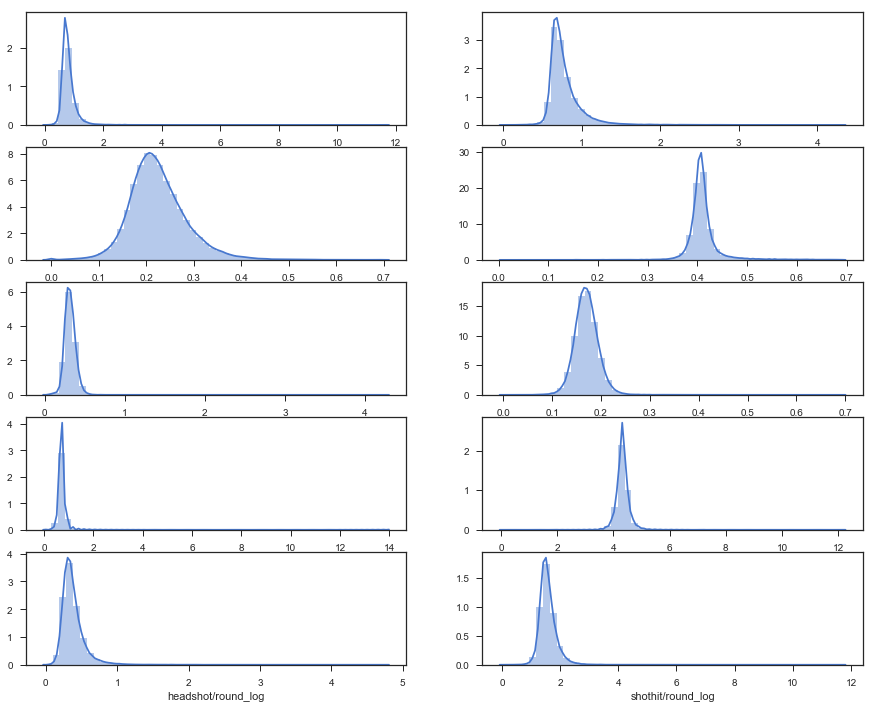

In [42]:
#sns.distplot(profiles['total_kills_log'],fit=norm, bins = 500,ax=axes[0, 0])
#sns.distplot(profiles['total_deaths_log'],fit=norm, bins = 500,ax=axes[0, 1])

sns.set(style="ticks", palette="muted")
f, axes = plt.subplots(5, 2, figsize=(15, 12),sharex=False)
sns.distplot(active_profiles["kills/round_log"] ,ax=axes[0, 0])
sns.distplot(active_profiles["deaths/round_log"] ,ax=axes[0, 1])
sns.distplot(active_profiles["mvps/win_log"] ,ax=axes[1, 0])
sns.distplot(active_profiles["wins/round_log"],ax=axes[1, 1])
sns.distplot(active_profiles["headshot/kills_log"] ,ax=axes[2, 0])
sns.distplot(active_profiles["shothit/shotfire_log"] ,ax=axes[2, 1])
sns.distplot(active_profiles["kill/death_log"] ,ax=axes[3, 0])
sns.distplot(active_profiles["time/round_log"],ax=axes[3, 1])
sns.distplot(active_profiles["headshot/round_log"] ,ax=axes[4, 0])
sns.distplot(active_profiles["shothit/round_log"] ,ax=axes[4, 1])
plt.show()

In [58]:
feat_list = ("kills/round_log","deaths/round_log","mvps/win_log", "wins/round_log", "headshot/kills_log") 
feat_list2 = ("shothit/shotfire_log", "kill/death_log","time/round_log", "headshot/round_log", "shothit/round_log")
feat_list3 = ("shothit/shotfire_log","kill/death_log","mvps/win_log","headshot/kills_log")

In [10]:
active_profiles = pd.read_csv('active_master_all.csv')

In [15]:
list(active_profiles)

['Unnamed: 0',
 'index',
 'user_id',
 'rank_id',
 'goal_id',
 'played_freq',
 'servers_ratio',
 'country_ratio',
 'lang_ratio',
 'ak47',
 'aug',
 'awp',
 'bizon',
 'deagle',
 'elite',
 'famas',
 'fiveseven',
 'g3sg1',
 'galilar',
 'glock',
 'hegrenade',
 'hkp2000',
 'knife',
 'm249',
 'm4a1',
 'mac10',
 'mag7',
 'molotov',
 'mp7',
 'mp9',
 'negev',
 'nova',
 'p250',
 'p90',
 'sawedoff',
 'scar20',
 'sg556',
 'ssg08',
 'taser',
 'tec9',
 'ump45',
 'xm1014',
 'kills/round',
 'deaths/round',
 'mvps/win',
 'wins/round',
 'headshot/kills',
 'shothit/shotfire',
 'kill/death',
 'time/round',
 'headshot/round',
 'shothit/round',
 'rank_group',
 'kills/round_log',
 'deaths/round_log',
 'mvps/win_log',
 'wins/round_log',
 'headshot/kills_log',
 'shothit/shotfire_log',
 'kill/death_log',
 'time/round_log',
 'headshot/round_log',
 'shothit/round_log']

In [ ]:
#parms = st.powerlaw.fit(active_master['played_freq'])
#st.kstest(active_master['played_freq'].values,'chi2',parms)

data = active_master['played_freq']
data_sorted=np.sort(data)
rank = np.log(np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1))

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(data_sorted, rank, s=2, label= i)

mean, var = st.chi2.fit(data_sorted[:-500])
ax = np.sort(st.chi2.rvs(mean, var, size=len(rank)))
plt.plot(ax, rank, color='pink', label='norm')
lin_data = data_sorted[-865:]
lin_rank = rank[-865:]

slope, intercept = np.polyfit(lin_data, lin_rank, 1) #Least squares polynomial fit

line_values = np.array([slope * i + intercept for i in lin_data])
plt.plot(lin_data, line_values, color='purple', label='linear regression for tail')

plt.legend()
plt.show()

In [ ]:
feat_list3 = ("shothit/shotfire_log")#,"kill/death_log","mvps/win_log","headshot/kills_log")
# Student-t	Weibull2	Normal	Laplace
sns.set(style="ticks", palette="muted")

for i in feat_list3:
    data = active_profiles[i]
    data_sorted=np.sort(data)
    rank = np.log(np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1))
    
    fig, ax = plt.subplots(figsize=(8,4))
    plt.scatter(data_sorted, rank, s=2, label= i)
    
    mean, var = stats.t.fit(data_sorted[:-500])
    ax = np.sort(stats.t.rvs(mean, var, size=len(rank)))
    plt.plot(ax, rank, color='red', label='t')
    lin_data = data_sorted[-865:]
    lin_rank = rank[-865:]

    slope, intercept = np.polyfit(lin_data, lin_rank, 1) #Least squares polynomial fit

    line_values = np.array([slope * i + intercept for i in lin_data])
    plt.plot(lin_data, line_values, color='purple', label='linear regression for tail')

    plt.legend()
    plt.show()

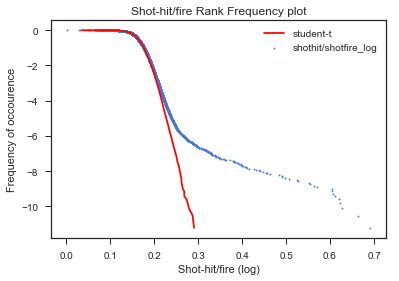

In [30]:
#feat_list3 = ("shothit/shotfire_log","kill/death_log","mvps/win_log","headshot/kills_log")

data = active_profiles["shothit/shotfire_log"]
data_sorted=np.sort(data)
rank = np.log(np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1))
#sns.set()
# Plot body
fig, ax = plt.subplots(figsize=(6,4))
# plt.rcParams['figure.facecolor']='white'
plt.scatter(data_sorted, rank, s=2, label="shothit/shotfire_log")
#mean, var, loc, scale = stats.norm.fit(data_sorted[:-865])
#ax = np.sort(stats.norm.rvs(mean, var, loc, scale, size=len(rank)))
#plt.plot(ax, rank, color='g', label='dist fit for body')

#student_data = st.t.rvs(df= df, loc=loc_t, scale =scale_t, size=len(empirical))

#c_we2, loc_we2, scale_we2 = stats.t.fit(data_sorted[:-500])
df, loc_t, scale_t = stats.t.fit(data_sorted[:-500])
#weibull2_data = st.dweibull.rvs(c = c_we2, loc=loc_we2, scale =scale_we2, size=len(data_sorted[:-500]))
ax = np.sort(stats.t.rvs(df= df, loc=loc_t, scale =scale_t, size=len(rank)))
#ax = np.sort(stats.dweibull.rvs(c = c_we2, loc=loc_we2, scale =scale_we2, size=len(rank)))
plt.plot(ax, rank, color='red', label='student-t')

plt.title("Shot-hit/fire Rank Frequency plot")
plt.xlabel("Shot-hit/fire (log)")
plt.ylabel("Frequency of occourence")


# Plot tail
#lin_data = data_sorted[-865:]
#lin_rank = rank[-865:]

#slope, intercept = np.polyfit(lin_data, lin_rank, 1) #Least squares polynomial fit

#line_values = np.array([slope * i + intercept for i in lin_data])
#plt.plot(lin_data, line_values, color='purple', label='linear regression for tail')

plt.legend()
plt.show()

In [ ]:
parms = st.powerlaw.fit(active_master['played_freq'])
st.kstest(active_master['played_freq'].values,'chi2',parms)

In [ ]:
def measure(name, params, data, dist, y, pdf):
    if name == 'rmse':
        mse = np.sum(np.power(y - pdf, 2.0))/len(y)
        results = np.sqrt(mse)
        return results
    elif name == 'mle':
        #dist=getattr(stats, dist)
        return dist.nnlf(params, data)
    elif name == 'kld':
        return np.sum(np.where(y != 0, y * np.log(y / pdf), 0))

def rmse(y, pdf):
    mse = np.sum(np.power(y - pdf, 2.0))/len(y)
    results = np.sqrt(mse)
    return results

def mle(params, data, dist):
    dist=getattr(stats, dist)
    return dist.nnlf(params, data)

def kld(y, pdf):
    return np.sum(np.where(y != 0, y * np.log(y / pdf), 0))

# Weapons hit/shot rate 

In [8]:
csgo_weapons = pd.DataFrame(csgo_weapons, columns = colnames_w)
# data shape
print("data shape:",csgo_weapons.shape)
weapons_counts = csgo_weapons['weapon_name'].value_counts()
#print("No. of weapon types:",weapons_counts)

# print columns
print("There are",csgo_weapons.shape[1],"columns:")
print(colnames_w)
#csgo_weapons[:5]

data shape: (683001, 5)
There are 5 columns:
['user_id', 'weapon_name', 'total_kills', 'total_hits', 'total_shots']


In [6]:
csgo_weapons

NameError: name 'csgo_weapons' is not defined

In [10]:
csgo_weapons['weapon_hit_shot_rate']= csgo_weapons['total_hits']/csgo_weapons['total_shots']
csgo_weapons['weapon_hit_shot_rate'].head(5)

0    0.183458
1    0.160884
2    0.142035
3    0.139250
4    0.161520
Name: weapon_hit_shot_rate, dtype: float64

In [28]:
weapons_profiles = csgo_weapons.drop(['total_kills','total_hits','total_shots'],axis=1)
weapons_prof = weapons_profiles.pivot(index='user_id', columns='weapon_name', values='weapon_hit_shot_rate').fillna(0)
weapons_prof.to_csv('player_weapons.csv')

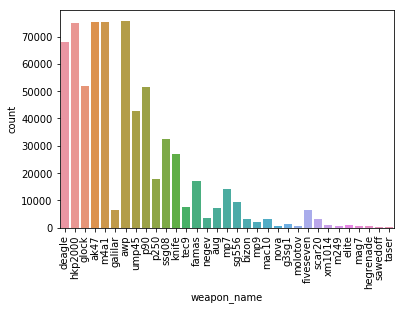

In [19]:
sns.countplot(x='weapon_name', data=csgo_weapons)
plt.xticks(rotation=90)
plt.show()
#g.set_xticklabels(rotation=30)

In [20]:
byweapon = csgo_weapons.groupby('weapon_name')

In [21]:
byweapon['weapon_hit_shot_rate'].describe()
#bytreatment['RelativeFitness'].describe()


,count,mean,std,min,25%,50%,75%,max
weapon_name,,,,,,,,
ak47,75425.0,0.173043,0.576763,0.000000,0.151338,0.168354,0.186459,139.054945
aug,7340.0,0.302312,4.966616,0.000000,0.183072,0.212913,0.249551,402.250000
awp,75844.0,0.371570,7.971596,0.000000,0.298678,0.337292,0.378342,2193.160243
bizon,3145.0,0.190688,0.075644,0.000000,0.153252,0.177402,0.209798,1.189003
deagle,67890.0,0.235251,0.065338,0.000000,0.204730,0.231099,0.260095,8.890547
elite,807.0,0.252298,0.222995,0.000000,0.166858,0.210059,0.272101,4.767234
famas,17159.0,0.204035,0.090602,0.000000,0.180036,0.199000,0.219042,8.311927
fiveseven,6536.0,0.217451,0.056864,0.000000,0.185857,0.210103,0.239522,1.089930
g3sg1,1336.0,0.449560,5.708761,0.000000,0.175030,0.217121,0.285288,208.679670


In [22]:
csgo_weapons.shape

(683001, 6)

In [23]:
#byweapon['weapon_hit_shot_rate_mean'] = byweapon['weapon_hit_shot_rate].mean
#byweapon = csgo_weapons.groupby('weapon_name')

weapon_mean_df = pd.DataFrame(csgo_weapons.groupby(by=['weapon_name'])['weapon_hit_shot_rate'].mean().sort_values(ascending=False).reset_index())
weapon_mean_df
#weapon_name_df=pd.DataFrame(csgo_weapons['weapon_name'].unique(),columns=['weapon_name'])
#weapon_name_df

,weapon_name,weapon_hit_shot_rate
0,m249,0.451439
1,g3sg1,0.449560
2,scar20,0.387477
3,awp,0.371570
4,aug,0.302312
5,ssg08,0.276329
6,negev,0.273259
7,mag7,0.259733
8,elite,0.252298
9,tec9,0.240272


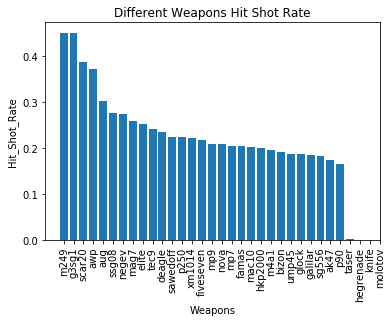

In [24]:
n = len(weapon_mean_df['weapon_hit_shot_rate'])
n
weapon_mean = weapon_mean_df['weapon_hit_shot_rate']
index = np.arange(n)
rects1 = plt.bar(index, weapon_mean)
plt.xticks(index, weapon_mean_df['weapon_name'], rotation='vertical')
plt.title('Different Weapons Hit Shot Rate')
plt.xlabel('Weapons')
plt.ylabel('Hit_Shot_Rate')
plt.show()

#sns.barplot(x='weapon_name', data=result)


In [ ]:
#sns.barplot(x="weapon_name",y="mean" data=byweapon)

# Kills (single variable analysis)

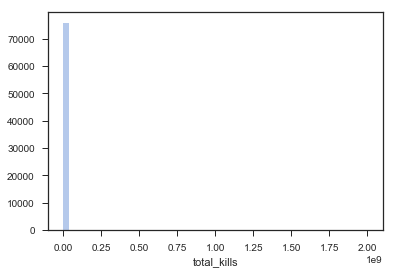

In [26]:
# plot histogram distributions
sns.set(style="ticks", palette="muted")
#f, axes = plt.subplots(1, 2, figsize=(15, 12),sharex=False)
sns.distplot(profiles['total_kills'],kde=False) #,ax=axes[0, 0])


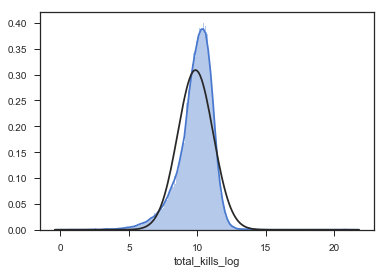

In [27]:
profiles['total_kills_log'] = np.log(1+profiles['total_kills'])
sns.distplot(profiles['total_kills_log'],fit=norm, bins = 500) #,ax=axes[2, 0])

In [28]:
parameters_kills = norm.fit(profiles['total_kills_log'])
kills_log_mu = parameters_kills[0]
kills_log_std = parameters_kills[1]
print("kills_log_mu:", kills_log_mu)
print("kills_log_std:", kills_log_std)

kills_log_mu: 9.86643361906
kills_log_std: 1.29160020737


In [29]:
x = np.linspace(-5,25,200)
kills_fitted_pdf = norm.pdf(x,loc = kills_mu,scale = kills_std)
normal_pdf = norm.pdf(x)
plt.plot(x,kills_fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)

NameError: name 'kills_mu' is not defined

In [ ]:
sns.distplot(profiles['total_kills_log'], bins = 500) #,ax=axes[2, 0])
plt.plot(x,kills_fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
#plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.show()

In [30]:
moments = pd.DataFrame(columns = ['variable','mean','variance','skewness','kurtosis'])
#variables = ['total_time_played','total_rounds_played','total_shots_fired','total_shots_hit',
#             'total_kills','total_deaths','total_kills_headshot','total_wins','total_mvps','kill_death','shots_hit_rate']
variables = ['total_kills']
print('total_kills 4 moments')
for var in variables:
    moments.loc[moments.shape[0]+1]={'variable':var,'mean':profiles[var].mean(),'variance':profiles[var].var(),'skewness':profiles[var].skew(),'kurtosis':profiles[var].kurtosis()}
moments

total_kills 4 moments


,variable,mean,variance,skewness,kurtosis
1,total_kills,237159.224858,2.224746e+14,86.854068,8387.34195


In [23]:
# function for fitting distributions
def fitDist(distributions,data):
    df_fit = pd.DataFrame(columns=['dist','parms','loglik']) # dataframe to hold fitting results
    # fit distributions
    for dist in distributions:
        parms = dist.fit(data)
        loglik = -dist.nnlf(parms,data)
        # add fitting results to the dataframe
        result = pd.DataFrame([dist.name,parms,loglik]).T
        result.columns = df_fit.columns
        df_fit = pd.concat([df_fit,result],ignore_index=True)
    return df_fit

# All 4 single variables

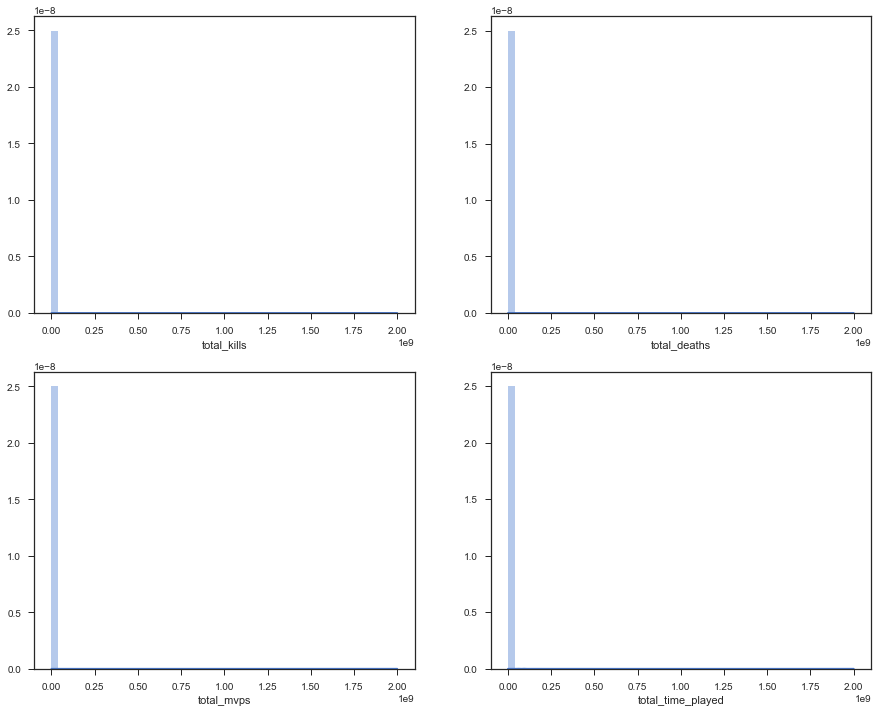

In [33]:
sns.set(style="ticks", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(15, 12),sharex=False)
sns.distplot(profiles['total_kills'] ,ax=axes[0, 0])
sns.distplot(profiles['total_deaths'] ,ax=axes[0, 1])
sns.distplot(profiles['total_mvps'] ,ax=axes[1, 0])
sns.distplot(profiles['total_time_played'],ax=axes[1, 1])

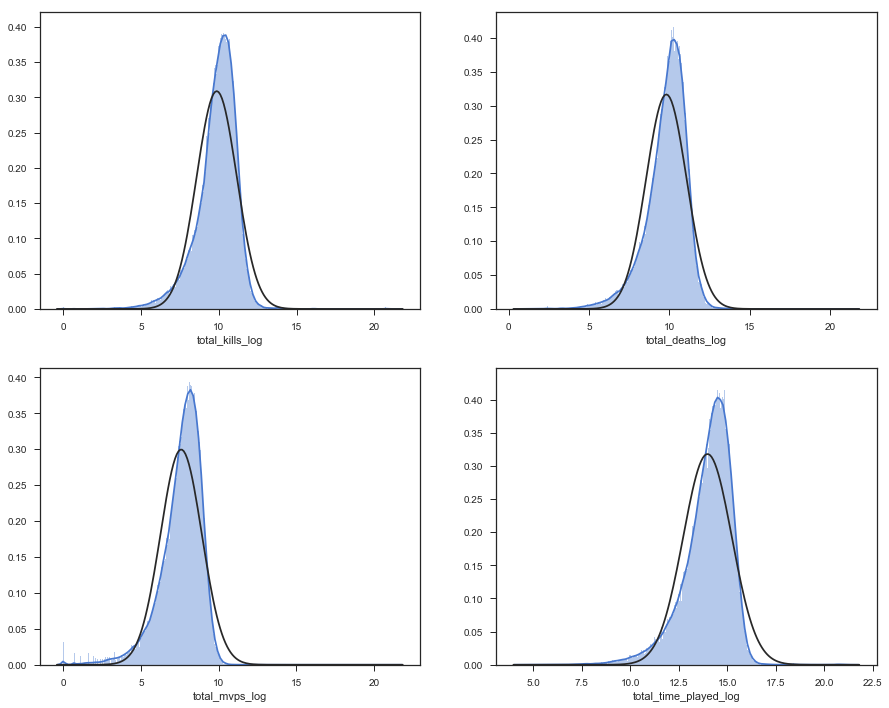

In [34]:
profiles['total_kills_log'] = np.log(1+profiles['total_kills'])
profiles['total_deaths_log'] = np.log(1+profiles['total_deaths'])
profiles['total_mvps_log'] = np.log(1+profiles['total_mvps'])
profiles['total_time_played_log'] = np.log(1+profiles['total_time_played'])

sns.set(style="ticks", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(15, 12),sharex=False)
sns.distplot(profiles['total_kills_log'],fit=norm, bins = 500,ax=axes[0, 0])
sns.distplot(profiles['total_deaths_log'],fit=norm, bins = 500,ax=axes[0, 1])
sns.distplot(profiles['total_mvps_log'],fit=norm, bins = 500,ax=axes[1, 0])
sns.distplot(profiles['total_time_played_log'],fit=norm, bins = 500,ax=axes[1, 1])
plt.show()

In [35]:
moments = pd.DataFrame(columns = ['variable','mean','variance','skewness','kurtosis'])
#variables = ['total_time_played','total_rounds_played','total_shots_fired','total_shots_hit',
#             'total_kills','total_deaths','total_kills_headshot','total_wins','total_mvps','kill_death','shots_hit_rate']
variables = ['total_time_played','total_kills','total_deaths', 'total_mvps']
print('4 moments')
for var in variables:
    moments.loc[moments.shape[0]+1]={'variable':var,'mean':profiles[var].mean(),'variance':profiles[var].var(),'skewness':profiles[var].skew(),'kurtosis':profiles[var].kurtosis()}
moments

4 moments


,variable,mean,variance,skewness,kurtosis
1,total_time_played,2.457022e+06,4.865348e+14,57.482688,3722.379909
2,total_kills,2.371592e+05,2.224746e+14,86.854068,8387.341950
3,total_deaths,6.196399e+04,5.309732e+13,272.504908,74758.377666
4,total_mvps,8.285622e+04,1.041602e+14,151.993373,25321.247474


1044.0 2475.0 4797.0
3753.0


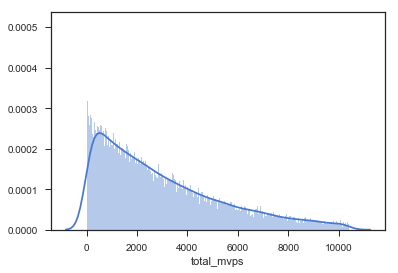

In [36]:
from scipy.stats import binom
q_25_mvps = profiles['total_mvps'].quantile(0.25)
q_50_mvps = profiles['total_mvps'].quantile(0.5)
q_75_mvps = profiles['total_mvps'].quantile(0.75)
print(q_25_mvps, q_50_mvps, q_75_mvps)
IQR_mvps = q_75_mvps-q_25_mvps
print(IQR_mvps)
total_mvps_wo_outlier = profiles['total_mvps'][np.logical_and(profiles['total_mvps'] <= q_75_mvps + 1.5*IQR_mvps, profiles['total_mvps'] >= q_25_mvps - 1.5*IQR_mvps)]
sns.distplot(total_mvps_wo_outlier, bins = 500)


In [37]:
IQR_mvps

3753.0

In [ ]:
# call function to fit distributions to 'total_time_played' data
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.skewnorm,stats.f,stats.powerlaw]
df_fit = fitDist(distributions,profiles['IQR_mvps'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

In [39]:
profiles['total_kills_log'].min()

0.0

In [40]:
quantile = pd.DataFrame(columns = ['variable','min','q25','q50','q75', 'max'])
variables = ['total_kills','total_deaths', 'total_mvps', 'total_time_played']
print('Quatile')
for var in variables:
    quantile .loc[quantile.shape[0]+1]={'variable':var,'min':profiles[var].min(),'q25':profiles[var].quantile(0.25),'q50':profiles[var].quantile(0.50),'q75':profiles[var].quantile(0.75), 'max':profiles[var].max()}
quantile 


Quatile


,variable,min,q25,q50,q75,max
1,total_kills,0.0,10632.25,23609.5,45086.50,2.000002e+09
2,total_deaths,1.0,9876.00,22535.0,42472.75,2.000001e+09
3,total_mvps,0.0,1044.00,2475.0,4797.00,2.000000e+09
4,total_time_played,78.0,652855.75,1489283.5,2785166.00,2.000206e+09


In [41]:
kills_log_q25 = profiles['total_kills'].quantile(0.25)
kills_log_q25 
#kills_log_q50 = profiles_1['total_kills_log'].quantile(0.5)
#kills_log_q75= profiles_1['total_kills_log'].quantile(0.75)

10632.25

In [25]:
# call function to fit distributions to 'total_time_played' data
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.skewnorm,stats.uniform,
                 stats.f,stats.powerlaw, stats.levy, stats.pearsonr, stats.poisson]
df_fit = fitDist(distributions,profiles['total_kills'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


AttributeError: 'function' object has no attribute 'fit'

In [26]:
# call function to fit distributions to 'total_time_played' data
distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
df_fit = fitDist(distributions,profiles['total_deaths'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,index,dist,parms,loglik
0,5,lognorm,"(0.923863024259, -2652.37627594, 23306.4135279)",-865088
1,7,f,"(1940662.74445, 5.30838142958, -10260.4124496,...",-866185
2,1,t,"(2.37907806706, 22596.9008727, 17239.8513516)",-882493
3,2,beta,"(0.470575668387, 27306.3815542, 1.0, 425381737...",-903951
4,6,chi2,"(0.293006080387, 1.0, 13678488.8775)",-966626
5,4,chi,"(0.151305556414, 1.0, 9631295.84779)",-982587
6,0,norm,"(61963.994836, 7286742.99669)",-1.30721e+06
7,3,gamma,"(0.00011444380301, 2076228073.68, 7.1216029105...",-inf


In [44]:
# call function to fit distributions to 'total_time_played' data
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,stats.cauchy,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.skewnorm,stats.f,stats.powerlaw]
df_fit = fitDist(distributions,profiles['total_wins'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,index,dist,parms,loglik
0,6,lognorm,"(0.871773185958, -1476.90570912, 10894.6124614)",-802956
1,3,t,"(2.90148968348, 11074.961148, 7347.17082458)",-818263
2,5,dweibull,"(0.57104600195, 7539.0, 8956.51845143)",-843345
3,4,chi2,"(0.24607266951, -2.68699901539e-19, 22263425.0...",-918341
4,9,f,"(1.443068105, 0.154984696436, -5.12517551093e-...",-942416
5,0,expon,"(-9.2512999501e-11, 131546.558609)",-970670
6,10,powerlaw,"(0.165108135833, -2.87125639239e-18, 368351865...",-983155
7,2,logistic,"(13731.4729416, 118563.317273)",-1.06776e+06
8,7,gamma,"(0.00105898376632, -4.81721031936e-17, 1266547...",-1.20453e+06
9,1,norm,"(131546.560611, 11621356.0081)",-1.34264e+06


In [45]:
# call function to fit distributions to 'total_time_played' data
distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
df_fit = fitDist(distributions,profiles['total_time_played'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,index,dist,parms,loglik
0,5,lognorm,"(0.892524706684, -197339.337243, 1553410.28676)",-1.18125e+06
1,2,beta,"(1.07841995103, 2249.99432372, -9249.85289064,...",-1.19677e+06
2,7,f,"(3702275.67034, 1.23004469992, -11703.0047787,...",-1.20853e+06
3,6,chi2,"(0.539900423773, 78.0, 36928500.6655)",-1.24033e+06
4,4,chi,"(0.287683463163, 78.0, 33788048.342)",-1.2481e+06
5,1,t,"(0.105649444566, 548611.229631, 212.796571437)",-1.33471e+06
6,0,norm,"(2457021.6887, 22057389.6629)",-1.39129e+06
7,3,gamma,"(0.00257197532858, 2076439584.1, 7.12160291051...",-inf


# mvp/win rate

In [46]:
# check players with zero 'total_wins'
print("No. of zero 'total_wins':",len(profiles[profiles['total_wins']==0]))
print(profiles['total_wins'].isnull().sum())
profiles.shape
profiles['total_wins'].count()

No. of zero 'total_wins': 10
0


75910

In [47]:
# calculate mvp/win rate
for row in range(0,profiles.shape[0]):
    if profiles.loc[row,'total_wins']!=0:
        profiles.loc[row,'mvp_win_rate'] = profiles.loc[row,'total_mvps']/profiles.loc[row,'total_wins']
    else: profiles.loc[row,'mvp_win_rate'] = 0
print()
print("mean:",profiles['mvp_win_rate'].mean())
print()
print(profiles['mvp_win_rate'].isnull().sum())


mean: 0.8669535668041528

0


In [48]:
profiles['mvp_win_rate'][:10]

0    0.000000
1    0.136142
2    0.000000
3    0.204545
4    0.112500
5    0.314276
6    0.306917
7    0.274004
8    0.225067
9    0.410256
Name: mvp_win_rate, dtype: float64

In [49]:
q_mvp_win = pd.DataFrame(columns = ['variable','min','q25','q50','q75', 'max'])
#variables = ['total_kills','total_deaths', 'total_mvps', 'total_time_played']
variables = ['mvp_win_rate']
print('q_mvp_win')
for var in variables:
    q_mvp_win.loc[q_mvp_win.shape[0]+1]={'variable':var,'min':profiles[var].min(),'q25':profiles[var].quantile(0.25),'q50':profiles[var].quantile(0.50),'q75':profiles[var].quantile(0.75), 'max':profiles[var].max()}
q_mvp_win 

q_mvp_win


,variable,min,q25,q50,q75,max
1,mvp_win_rate,0.0,0.202627,0.242132,0.291616,25897.941385


In [50]:
print(profiles['total_mvps'].sum())
print(profiles['total_wins'].sum())
print(profiles['total_rounds_played'].sum())


6289615426.0
9985699416.0
8666064567.0


In [51]:
count =0
for i in range (0,len(profiles['total_rounds_played'])):
    if profiles['total_rounds_played'] profiles['total_rounds_played'] > profiles['total_wins']:
        count += 1
print(count)


#for e,f in profiles.items():
#    if f ['total_rounds_played'] < f ['total_wins']:
#        print(e) 

SyntaxError: invalid syntax (<ipython-input-51-5171cdb8d0d9>, line 3)

In [116]:
# call function to fit distributions to 'total_time_played' data
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
print ('MLE for MVP Win Rate')
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.powerlaw,
                 stats.beta,stats.chi,stats.f,stats.skewnorm]
df_fit = fitDist(distributions,profiles['mvp_win_rate'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

MLE for MVP Win Rate


/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3449: RuntimeWarning: overflow encountered in exp
  return -x - 2. * sc.log1p(np.exp(-x))
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


,index,dist,parms,loglik
0,3,t,"(3.41894333773, 0.244117098534, 0.0572154625385)",85974.4
1,6,lognorm,"(0.274188028911, -0.0747169716352, 0.317707258...",77549.1
2,5,dweibull,"(0.183877243853, 0.236393558246, 63.8305944543)",-52254.3
3,7,gamma,"(0.303661995441, -3.34828033702e-09, 3.7284007...",-53285.3
4,9,beta,"(0.393179912615, 11072.324101, -1.81167177992e...",-58561
5,0,expon,"(-1.15552327889e-09, 0.868586876878)",-65072.5
6,11,f,"(0.372392455036, 0.393484146473, -2.6718706127...",-100967
7,4,chi2,"(0.289729804613, -6.83124950984e-24, 220.35612...",-111113
8,10,chi,"(0.147274489105, -3.80739383529e-24, 150.99714...",-128044
9,2,logistic,"(0.253135151587, 0.620056184168)",-144457


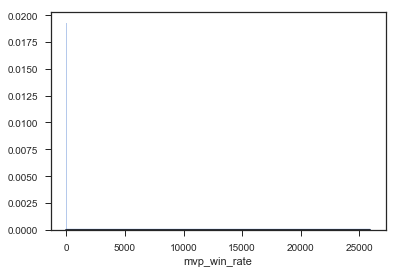

In [53]:
from scipy.stats import t
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1, 1)
#profiles['mvp_win_rate_log'] = np.log(1+profiles['mvp_win_rate'])
sns.distplot(profiles['mvp_win_rate'],fit=t, bins = 500)

In [54]:
q_25 = profiles['mvp_win_rate'].quantile(0.25)
q_50 = profiles['mvp_win_rate'].quantile(0.5)
q_75 = profiles['mvp_win_rate'].quantile(0.75)
print(q_25, q_50, q_75)
IQR = q_75-q_25
print(IQR)

0.20262670780214342 0.24213160357884944 0.2916155740925411
0.08898886629039765


In [55]:
mvp_win_wo_outlier = profiles['mvp_win_rate'][np.logical_and(profiles['mvp_win_rate'] <= q_75 + 1.5*IQR, profiles['mvp_win_rate'] >= q_25 - 1.5*IQR)]

In [56]:
sns.distplot(mvp_win_rate,kde=False)

NameError: name 'mvp_win_rate' is not defined

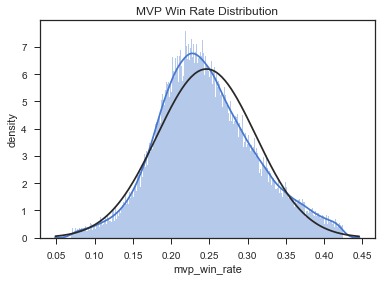

In [110]:
sns.distplot(mvp_win_wo_outlier,fit=t, bins = 500)
plt.title('MVP Win Rate Distribution')
plt.ylabel('density')
plt.show()

# Headshot/kill rate

In [60]:
# check players with zero 'total_kills'
print("No. of zero 'total_kills':",len(profiles[profiles['total_kills']==0]))
print(profiles['total_kills'].isnull().sum())
profiles.shape
profiles['total_kills'].count()

No. of zero 'total_kills': 7
0


75910

In [61]:
# calculate headshot/kill rate
for row in range(0,profiles.shape[0]):
    if profiles.loc[row,'total_kills']!=0:
        profiles.loc[row,'headshot_kill_rate'] = profiles.loc[row,'total_kills_headshot']/profiles.loc[row,'total_kills']
    else: profiles.loc[row,'headshot_kill_rate'] = 0
print()
print("mean:",profiles['headshot_kill_rate'].mean())
print()
print(profiles['headshot_kill_rate'].isnull().sum())


mean: 0.45486039046443166

0


In [62]:
profiles['headshot_kill_rate'][:5]

0    0.000000
1    0.308351
2    0.274194
3    0.292683
4    0.223037
Name: headshot_kill_rate, dtype: float64

In [63]:
q_headshot_kill = pd.DataFrame(columns = ['variable','min','q25','q50','q75', 'max'])
#variables = ['total_kills','total_deaths', 'total_mvps', 'total_time_played']
variables = ['headshot_kill_rate']
print('q_headshot_kill')
for var in variables:
    q_headshot_kill.loc[q_headshot_kill.shape[0]+1]={'variable':var,'min':profiles[var].min(),'q25':profiles[var].quantile(0.25),'q50':profiles[var].quantile(0.50),'q75':profiles[var].quantile(0.75), 'max':profiles[var].max()}
q_headshot_kill 

q_headshot_kill


,variable,min,q25,q50,q75,max
1,headshot_kill_rate,0.0,0.307883,0.362376,0.424973,3357.803622


In [115]:
# call function to fit distributions to 'total_time_played' data
print ('MLE for Headshot Kill Rate')
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.powerlaw,
                 stats.beta,stats.chi,stats.f,stats.skewnorm]
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f,stats.skewnorm]
df_fit = fitDist(distributions,profiles['headshot_kill_rate'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()
#print ('MLE for Headshot Kill Rate')

MLE for Headshot Kill Rate


/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


,index,dist,parms,loglik
0,3,t,"(4.82695560612, 0.365341869335, 0.0771600216586)",70340.5
1,6,lognorm,"(0.217183938405, -0.142083398883, 0.502186777457)",60490.4
2,5,dweibull,"(0.72513149074, 0.358051243688, 0.0750685748298)",53409.7
3,2,logistic,"(0.368078788552, 0.11883819641)",-9795.55
4,9,beta,"(1.53760309759, 18611.6569475, -0.000125868441...",-13767.1
5,0,expon,"(-1.42076604348e-09, 0.454864630865)",-16110.8
6,11,f,"(0.901220665355, 1.00895511995, -4.57751218013...",-76292.6
7,4,chi2,"(0.450392907061, -8.70633432084e-26, 23.194660...",-110853
8,10,chi,"(0.232258178793, -4.56283018275e-25, 18.129824...",-123016
9,8,powerlaw,"(0.102330115627, -8.15602103535e-24, 6261.5369...",-169579


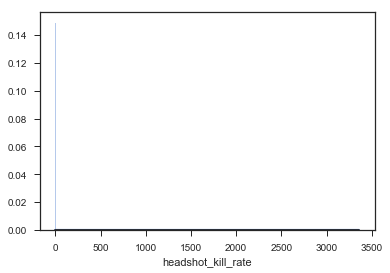

In [65]:
sns.distplot(profiles['headshot_kill_rate'],fit=t, bins = 500)

In [66]:
q_25 = profiles['headshot_kill_rate'].quantile(0.25)
q_50 = profiles['headshot_kill_rate'].quantile(0.5)
q_75 = profiles['headshot_kill_rate'].quantile(0.75)
print(q_25, q_50, q_75)
IQR = q_75-q_25
print(IQR)

0.30788285710035534 0.36237608990702286 0.4249730967948429
0.11709023969448756


In [67]:
headshot_kill_wo_outlier = profiles['headshot_kill_rate'][np.logical_and(profiles['headshot_kill_rate'] <= q_75 + 1.5*IQR, profiles['headshot_kill_rate'] >= q_25 - 1.5*IQR)]

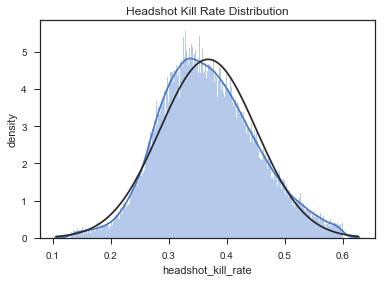

In [109]:
sns.distplot(headshot_kill_wo_outlier,fit=t, bins = 500, hist=True)
plt.title('Headshot Kill Rate Distribution')
plt.ylabel('density')
plt.show()

In [81]:
headshot_kill_wo_outlier.count()

73574

In [83]:
headshot_kill_wo_outlier

1        0.308351
2        0.274194
3        0.292683
4        0.223037
5        0.299179
6        0.343808
7        0.401578
8        0.380200
9        0.412541
10       0.481028
11       0.353829
12       0.389801
13       0.281701
14       0.517893
15       0.331989
16       0.418367
18       0.373350
19       0.447900
20       0.340173
21       0.394346
22       0.274194
23       0.554012
24       0.350316
25       0.315368
26       0.301312
27       0.283265
28       0.425908
29       0.356206
30       0.485427
31       0.329943
           ...   
75879    0.438806
75880    0.325858
75881    0.337572
75882    0.278694
75883    0.256806
75884    0.431363
75885    0.336176
75886    0.431889
75887    0.410406
75888    0.370673
75889    0.266051
75890    0.308828
75891    0.254644
75892    0.151158
75893    0.317488
75894    0.433156
75895    0.488267
75896    0.435798
75897    0.372462
75898    0.301548
75899    0.244831
75900    0.401830
75901    0.300180
75902    0.416653
75903    0

In [85]:
headshot_kill_wo_outlier_32=np.float32(headshot_kill_wo_outlier)
headshot_kill_wo_outlier_32

array([ 0.30835092,  0.27419356,  0.29268292, ...,  0.33934122,
        0.35957494,  0.42272151], dtype=float32)

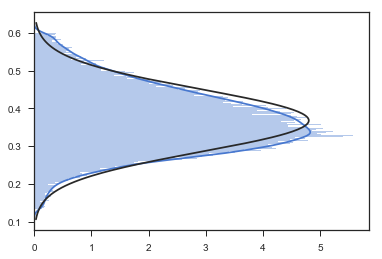

In [88]:
sns.distplot(headshot_kill_wo_outlier_32,fit=t, bins = 500, vertical = True)

# kill/death rate

In [69]:
# check players with zero 'total_deaths'
print("No. of zero 'total_deaths':",len(profiles[profiles['total_deaths']==0]))
print(profiles['total_deaths'].isnull().sum())
profiles.shape
profiles['total_deaths'].count()

No. of zero 'total_deaths': 0
0


75910

In [70]:
# calculate kill/death rate
for row in range(0,profiles.shape[0]):
    if profiles.loc[row,'total_deaths']!=0:
        profiles.loc[row,'kill_death_rate'] = profiles.loc[row,'total_kills']/profiles.loc[row,'total_deaths']
    else: profiles.loc[row,'kill_death_rate'] = 0
print()
print("mean:",profiles['kill_death_rate'].mean())
print()
print(profiles['kill_death_rate'].isnull().sum())


mean: 110.44370387561605

0


In [71]:
profiles['kill_death_rate'][:5]

0    0.111111
1    0.793251
2    0.901163
3    0.745455
4    1.034535
Name: kill_death_rate, dtype: float64

In [72]:
q_kill_death = pd.DataFrame(columns = ['variable','min','q25','q50','q75', 'max'])
#variables = ['total_kills','total_deaths', 'total_mvps', 'total_time_played']
variables = ['kill_death_rate']
print('q_kill_death')
for var in variables:
    q_kill_death.loc[q_kill_death.shape[0]+1]={'variable':var,'min':profiles[var].min(),'q25':profiles[var].quantile(0.25),'q50':profiles[var].quantile(0.50),'q75':profiles[var].quantile(0.75), 'max':profiles[var].max()}
q_kill_death 

q_kill_death


,variable,min,q25,q50,q75,max
1,kill_death_rate,0.0,0.914681,1.038809,1.182582,6.711411e+06


In [113]:
# call function to fit distributions to 'total_time_played' data
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f,stats.skewnorm]
print ('MLE for Kill Death Rate')
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.powerlaw,
                 stats.beta,stats.chi,stats.f,stats.skewnorm]
df_fit = fitDist(distributions,profiles['kill_death_rate'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

MLE for Kill Death Rate


/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3449: RuntimeWarning: overflow encountered in exp
  return -x - 2. * sc.log1p(np.exp(-x))
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/jennyyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


,index,dist,parms,loglik
0,3,t,"(1.87614468777, 1.03309184684, 0.154494812941)",-9872.15
1,6,lognorm,"(0.376572359887, -0.0151902703882, 1.07500672899)",-39065.4
2,11,f,"(3.66831627529, 3.45829202922, -7.6958080926e-...",-88187.1
3,5,dweibull,"(0.13561217156, 1.0228589194, 2832.97445582)",-163196
4,4,chi2,"(0.182851295713, -8.50710077234e-21, 48659.937...",-261565
5,10,chi,"(0.101366473061, -5.63098168284e-20, 26168.850...",-290173
6,8,powerlaw,"(0.16510812198, -1.4632941346e-21, 12360795.9647)",-344766
7,0,expon,"(-9.07045127095e-11, 110.44372306)",-433029
8,2,logistic,"(1.27535398705, 109.293721312)",-537410
9,7,gamma,"(0.000216547941455, -1.5964263584e-21, 40316.2...",-644914


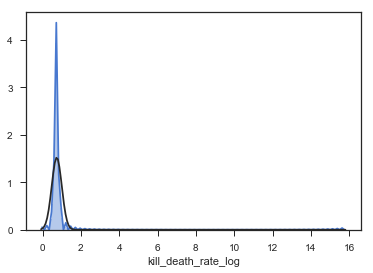

In [74]:
profiles['kill_death_rate_log'] = np.log(1+profiles['kill_death_rate'])
sns.distplot(profiles['kill_death_rate_log'],fit=norm, bins = 500) #,ax=axes[2, 0])

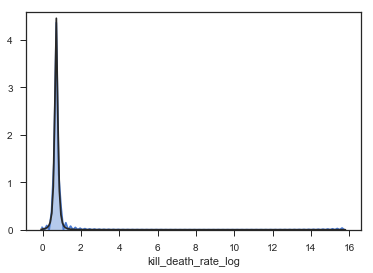

In [75]:
sns.distplot(profiles['kill_death_rate_log'],fit=t, bins = 500)

In [76]:
q_25 = profiles['kill_death_rate'].quantile(0.25)
q_50 = profiles['kill_death_rate'].quantile(0.5)
q_75 = profiles['kill_death_rate'].quantile(0.75)
print(q_25, q_50, q_75)
IQR = q_75-q_25
print(IQR)

0.9146805959022245 1.03880870924216 1.1825821384296396
0.26790154252741505


In [77]:
kill_death_wo_outlier = profiles['kill_death_rate'][np.logical_and(profiles['kill_death_rate'] <= q_75 + 1.5*IQR, profiles['kill_deatd

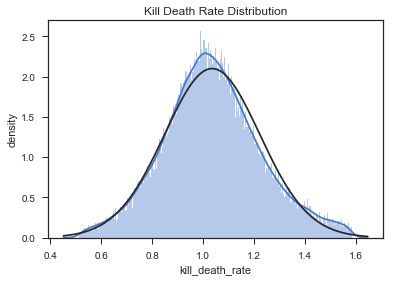

In [108]:
sns.distplot(kill_death_wo_outlier,fit=t, bins = 500, norm_hist = False)
#sns.distplot(kill_death_wo_outlier,fit=norm, bins = 500)

plt.title('Kill Death Rate Distribution')
plt.ylabel('density')
plt.show()

In [520]:
kd_var = profiles['kill_death_rate'].var()
kd_var
#kd_mean = profiles['kill_death_wo_outlier'].mean()
#kd_mean

611427233.4581188

In [ ]:
# call function to fit distributions to 'total_time_played' data
#distributions = [stats.norm,stats.t,stats.beta,stats.gamma,stats.chi,stats.lognorm,stats.chi2,stats.f]
distributions = [stats.expon,stats.norm,stats.logistic,stats.t,stats.chi2,
                 stats.dweibull,stats.lognorm,stats.gamma,stats.skewnorm,stats.f,stats.powerlaw]
df_fit = fitDist(distributions,profiles['kill_death_rate'])
# order by loglik
df_fit_order = df_fit.copy()
df_fit_order.sort_values(by='loglik',ascending=False).reset_index()

In [599]:
#kill_death_fitted = norm.fit(profiles['kill_death_rate'])
#yes = kill_death_fitted.mean()
#print(yes)

In [613]:
moments2 = pd.DataFrame(columns = ['variable','mean','median','variance','skewness','kurtosis'])
#variables = ['total_time_played','total_rounds_played','total_shots_fired','total_shots_hit',
#             'total_kills','total_deaths','total_kills_headshot','total_wins','total_mvps','kill_death','shots_hit_rate']
#variables = [mvp_win_wo_outlier,headshot_kill_wo_outlier]#,'total_kills','total_deaths', 'total_wins']
print('4 moments')
var1=mvp_win_wo_outlier
var2=headshot_kill_wo_outlier
var3=kill_death_wo_outlier
moments2.loc[moments2.shape[0]+1]={'variable':'mvp_win_wo_outlier','mean':var1.mean(),'median':var1.quantile(0.50),'variance':var1.var(),'skewness':var1.skew(),'kurtosis':var1.kurtosis()}
moments2.loc[moments2.shape[0]+1]={'variable':'headshot_kill_wo_outlier','mean':var2.mean(),'median':var2.quantile(0.50),'variance':var2.var(),'skewness':var2.skew(),'kurtosis':var2.kurtosis()}
moments2.loc[moments2.shape[0]+1]={'variable':'kill_death_wo_outlier','mean':var3.mean(),'median':var3.quantile(0.50),'variance':var3.var(),'skewness':var3.skew(),'kurtosis':var3.kurtosis()}
moments2

4 moments


,variable,mean,median,variance,skewness,kurtosis
1,mvp_win_wo_outlier,0.246164,0.240437,0.004157,0.281370,-0.019649
2,headshot_kill_wo_outlier,0.367924,0.362018,0.006904,0.237349,-0.119564
3,kill_death_wo_outlier,1.036184,1.027962,0.037166,0.188594,0.064388


In [387]:
stats.skew(profiles['total_kills'])

86.85235140891243

In [388]:
profiles['total_kills'].skew()

86.854067675763005

In [444]:
#load profile table 
conn = psycopg2.connect("dbname='dreamteam' user='jennyyang' host='localhost' port='5432' password=''")
cur = conn.cursor()
cur.execute('SELECT * FROM core.users')
colnames = [desc[0] for desc in cur.description]
core_users = cur.fetchall()
cur.close()
conn.close()


In [454]:
core_users = pd.DataFrame(core_users, columns = colnames)
# data shape
print("data shape:",core_users.shape)
print("No. of users:",core_users['id'].count())
print("Verified:",core_users[core_users['verified']!=False].count())
#profiles_plyrs[profiles_plyrs['total_time_played']!=False].count()
#print()
# print columns
#print("There are",core_users.shape[1],"columns:")
#print(colnames)
#csgo_profiles[:5]

data shape: (101937, 11)
No. of users: 101937
Verified: id                51082
created_at        51081
updated_at        51082
verified          51082
email_token       51082
birthday          50299
receive_emails    51082
gender            50299
avatar            18300
country           50299
city_id           38748
dtype: int64


In [ ]:
# Drop verified=false 
profiles_plyrs = profiles_plyrs[profiles_plyrs['total_time_played']!=0]
print("No. of players:",profiles_plyrs['user_id'].count())

In [628]:
print('kill_death_rate', profiles['kill_death_rate'].mean())
print('headshot_kill_rate', profiles['headshot_kill_rate'].mean())
print('mvp_win_rate', profiles['mvp_win_rate'].mean())

kill_death_rate 110.44370387561605
headshot_kill_rate 0.45486039046443166
mvp_win_rate 0.8669535668041528


## Map Stats

In [8]:
#load maps stats table 
conn = psycopg2.connect("dbname='dreamteam' user='jennyyang' host='localhost' port='5432' password=''")
cur = conn.cursor()
cur.execute('SELECT * FROM csgo.maps_stats')
colnames_w = [desc[0] for desc in cur.description]
csgo_maps = cur.fetchall()
cur.close()
conn.close()

In [9]:
csgo_maps = pd.DataFrame(csgo_maps, columns = colnames_w)
# data shape
print("data shape:",csgo_maps.shape)
maps_counts = csgo_maps['map_name'].value_counts()
print("No. of maps:",maps_counts)
print()
# print columns
print("There are",csgo_maps.shape[1],"columns:")
print(colnames_w)
csgo_maps[:5]

data shape: (224853, 4)
No. of maps: de_dust2         73983
de_inferno       68036
de_cbble         43728
de_train         11037
de_nuke           9877
cs_office         4416
de_lake           4102
de_safehouse      3859
de_bank           1336
de_dust            884
cs_assault         846
cs_italy           746
ar_shoots          544
de_aztec           425
de_vertigo         378
de_stmarc          181
de_shorttrain      165
cs_militia         129
ar_baggage          90
de_sugarcane        77
ar_monastery        10
de_embassy           1
de_balkan            1
de_prodigy           1
de_piranesi          1
Name: map_name, dtype: int64

There are 4 columns:
['user_id', 'total_rounds', 'total_wins', 'map_name']


,user_id,total_rounds,total_wins,map_name
0,49771,12935,6717,de_dust2
1,49771,1742,883,de_inferno
2,49771,105,59,de_cbble
3,13165,2959,1515,de_dust2
4,13165,114,63,de_inferno


In [10]:
bymap = csgo_maps.groupby('map_name')

In [12]:
bymap['total_wins'].sum()
map_df = pd.DataFrame(bymap['total_wins'].sum().sort_values(ascending=False).reset_index())
map_df

,map_name,total_wins
0,de_dust2,3614846516
1,de_inferno,3371610151
2,de_cbble,3014200187
3,ar_shoots,2000020040
4,de_safehouse,1988953534
5,de_train,1305064327
6,cs_militia,1111160862
7,de_lake,1000481218
8,ar_baggage,1000002848
9,de_balkan,999999999


In [13]:
# maps difficulities
map_win_df = pd.DataFrame(bymap['total_wins'].sum().sort_values(ascending=False).reset_index())
map_win_df

,map_name,total_wins
0,de_dust2,3614846516
1,de_inferno,3371610151
2,de_cbble,3014200187
3,ar_shoots,2000020040
4,de_safehouse,1988953534
5,de_train,1305064327
6,cs_militia,1111160862
7,de_lake,1000481218
8,ar_baggage,1000002848
9,de_balkan,999999999


In [14]:
# maps popularities
map_rounds_df = pd.DataFrame(bymap['total_rounds'].sum().sort_values(ascending=False).reset_index())
map_rounds_df

,map_name,total_rounds
0,de_dust2,4345208196
1,de_cbble,3517620445
2,de_inferno,3439429250
3,ar_shoots,2000034270
4,de_safehouse,1989743833
5,de_train,1309648052
6,cs_militia,1111196620
7,de_lake,1000970623
8,ar_baggage,1000003949
9,de_balkan,999999999


# Join core and csgo schemas

In [3]:
# load tables for id and time data
conn = psycopg2.connect("dbname='dreamteam' user='jennyyang' host='localhost' port='5432' password=''")
cur = conn.cursor()

# csgo.profiles
cur.execute('SELECT * FROM csgo.profiles')
colnames_1 = [desc[0] for desc in cur.description]
csgo_profiles = cur.fetchall()

# core.users
cur.execute('SELECT * FROM core.users')
colnames_2 = [desc[0] for desc in cur.description]
core_users = cur.fetchall()

# core.profiles
cur.execute('SELECT * FROM core.profiles')
colnames_3 = [desc[0] for desc in cur.description]
core_profiles = cur.fetchall()

cur.close()
conn.close()

In [4]:
csgo_profiles = pd.DataFrame(csgo_profiles, columns = colnames_1)
core_users = pd.DataFrame(core_users, columns = colnames_2)
core_profiles = pd.DataFrame(core_profiles, columns = colnames_3)

# data shape
print("csgo_profiles data shape:",csgo_profiles.shape)
print("core_users data shape:",core_users.shape)
print("core_profiles data shape:",core_profiles.shape)


csgo_profiles data shape: (84393, 17)
core_users data shape: (101937, 11)
core_profiles data shape: (105357, 6)


In [5]:
m1 = pd.merge(core_users, core_profiles, how='inner', left_on="id", right_on='id', copy=True)

In [6]:
m2 = pd.merge(m1, csgo_profiles, how='inner', left_on="user_id", right_on='user_id', copy=True)

In [7]:
m1.shape
m2.shape

(76481, 32)